<a href="https://colab.research.google.com/github/obeabi/Assignments/blob/master/Main_DVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data visualization assignment
# Written by Abiola Obembe
## Date: 2020-12-27
## Course: ML masters with deployment and deep learning

In [19]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

print("Libraries installed successfully!")

Libraries installed successfully!


# Question 1

In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

In [31]:
# Write code here
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.decomposition import PCA 
pca = PCA(3)   
pca_data = pd.DataFrame(pca.fit_transform(X)) 


  
print(pca_data.head())

          0         1         2
0 -2.684126  0.319397 -0.027915
1 -2.714142 -0.177001 -0.210464
2 -2.888991 -0.144949  0.017900
3 -2.745343 -0.318299  0.031559
4 -2.728717  0.326755  0.090079


In [33]:
from matplotlib import colors as mcolors 
import math 
   
clusters = 3
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips] 

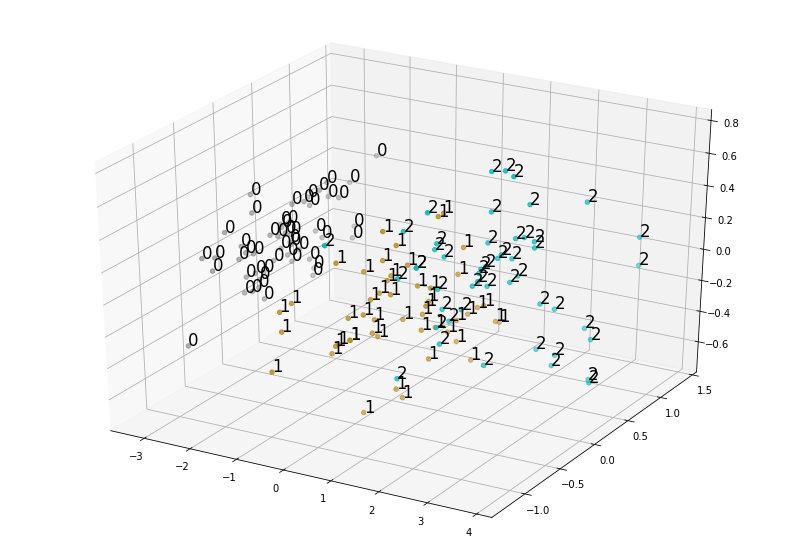

In [36]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure(figsize= (14,10)) 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            y))) 
   
str_labels = list(map(lambda label:'% s' % label, y)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 16.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
   
plt.show() 